# Libraries

In [1]:
import os

import numpy as np
import pandas as pd
from math import floor, ceil

import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

import xarray as xr
#import tensorflow as tf

print('All packages imported.')

All packages imported.


# Data Import

In [2]:
def get_ARM_files_path(site='twp-c1', data_stream='twparmbeatmC1', file_ext='nc'):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../../data/ARM/{site}/{data_stream}'
    FILE_PATH = f'{DATA_DIR}/{data_stream}.*.{file_ext}'
    return FILE_PATH

def get_DS(mf):
    return xr.open_mfdataset(mf)

In [3]:
# Get file
multiple_file_name = get_ARM_files_path(site='twp-c1',
                                        data_stream='twparmbeatmC1',
                                        file_ext='cdf')
DS = get_DS(multiple_file_name)
DS

<xarray.Dataset>
Dimensions:        (p: 37, range: 2, time: 131496, z: 512)
Coordinates:
  * time           (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
  * p              (p) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
  * z              (z) float32 15.0 60.0 105.0 150.0 ... 22920.0 22965.0 23010.0
    z10            float32 10.0
    z2             float32 2.0
Dimensions without coordinates: range
Data variables:
    base_time      (time) datetime64[ns] 1996-01-01 1996-01-01 ... 2010-01-01
    time_offset    (time) datetime64[ns] dask.array<shape=(131496,), chunksize=(8784,)>
    time_bounds    (time, range) datetime64[ns] dask.array<shape=(131496, 2), chunksize=(8784, 2)>
    time_frac      (time) datetime64[ns] dask.array<shape=(131496,), chunksize=(8784,)>
    p_bounds       (time, p, range) float64 dask.array<shape=(131496, 37, 2), chunksize=(8784, 37, 2)>
    z_bounds       (time, z, range) float64 dask.array<shape=(131496, 512, 2), chunksize=(8784

# Data Inspection

In [4]:
# , 'qc_precip'] # array of variables on surface
var_1d = ['T', 'p', 'rh', 'u', 'v', 'prec']
# , 'Td'] # array of variables with pressure/height coord
var_p_2d = ['T', 'rh', 'u', 'v']
var_z_2d = []
plev = DS['p'].values.astype(np.int32)  # array of pressure level
zlev = DS['z'].values.astype(np.int32)  # array of height level


def plot_1d(DS, var_1d=var_1d):
    time_value = DS.time.values
    for _var in var_1d:
        var_str = f'{_var}_sfc'
        x_value = DS[var_str].values
        fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
        
        sns.scatterplot(x_value, time_value, s=3, ax=ax[0])
        ax[0].set(xlabel=var_str, ylabel='Year')
        
        sns.distplot(x_value[~np.isnan(x_value)]) # distplot cannot handle NaN itself
        ax[1].set(xlabel=var_str, ylabel='Frenquency')

        plt.show()
    return None


def plot_2d(DS, var_p_2d=var_p_2d):
    for _var in var_p_2d:
        var_str = f'{_var}_p'
        x_value = DS[var_str].values
        fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
        
        DS[var_str].plot(ax=ax[0])
        
        sns.distplot(x_value[~np.isnan(x_value)]) # distplot cannot handle NaN itself
        ax[1].set(xlabel=var_str, ylabel='Frenquency')
        
        plt.show()
    return None

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


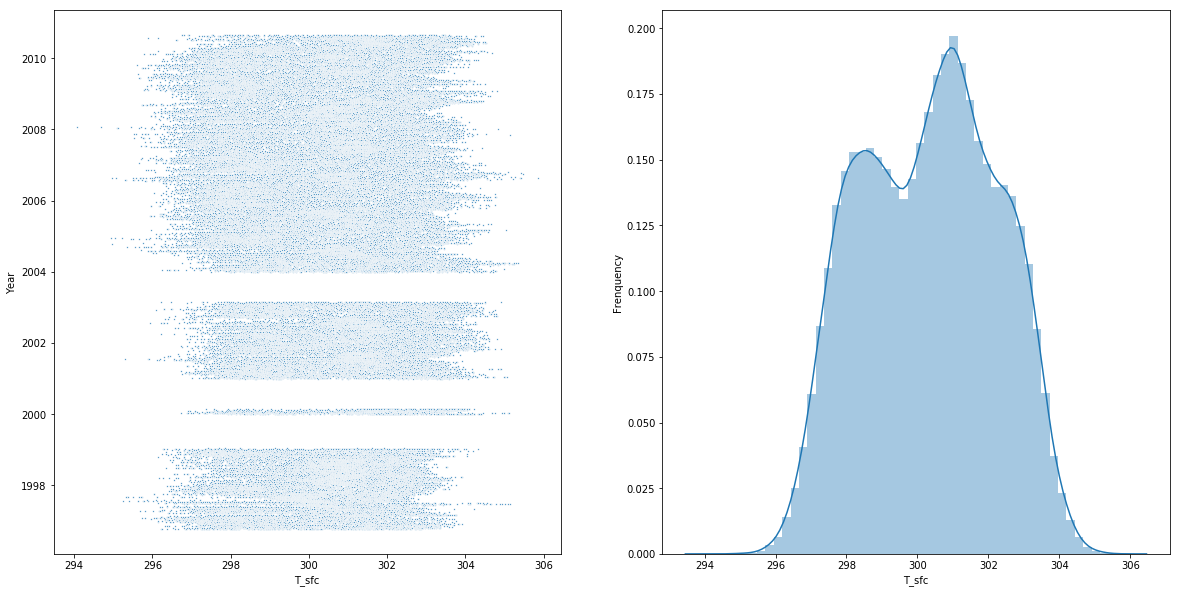

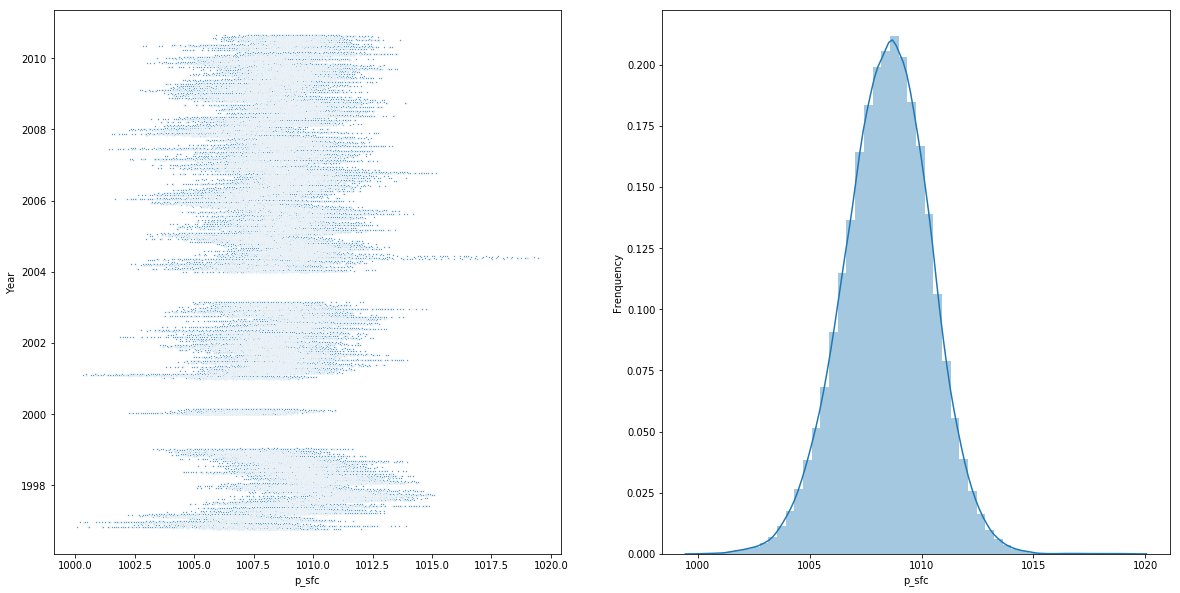

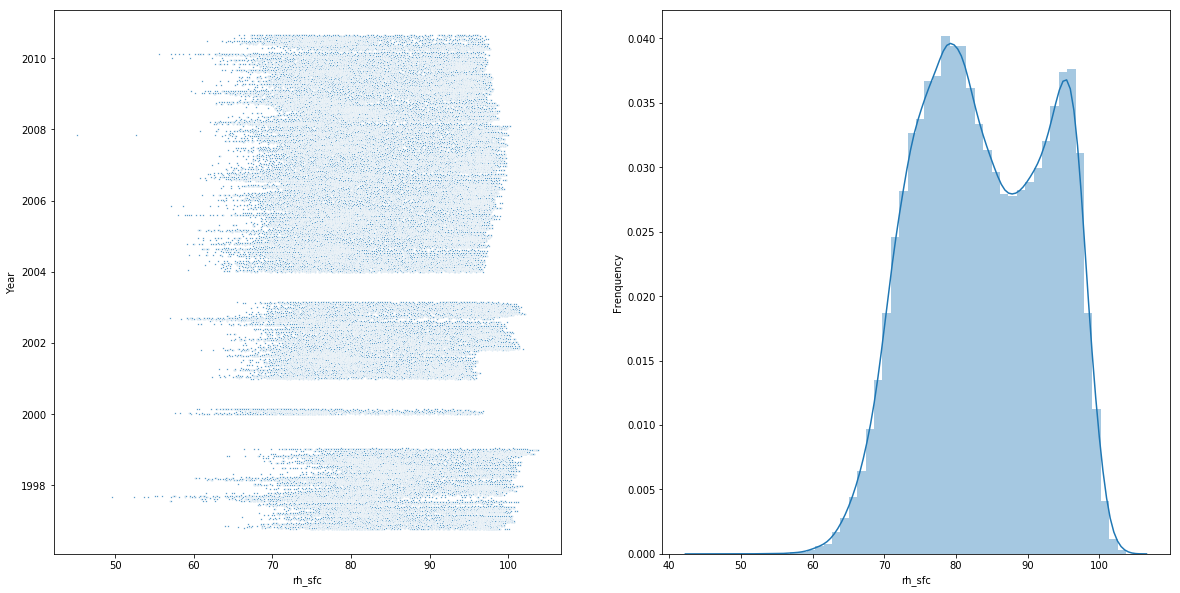

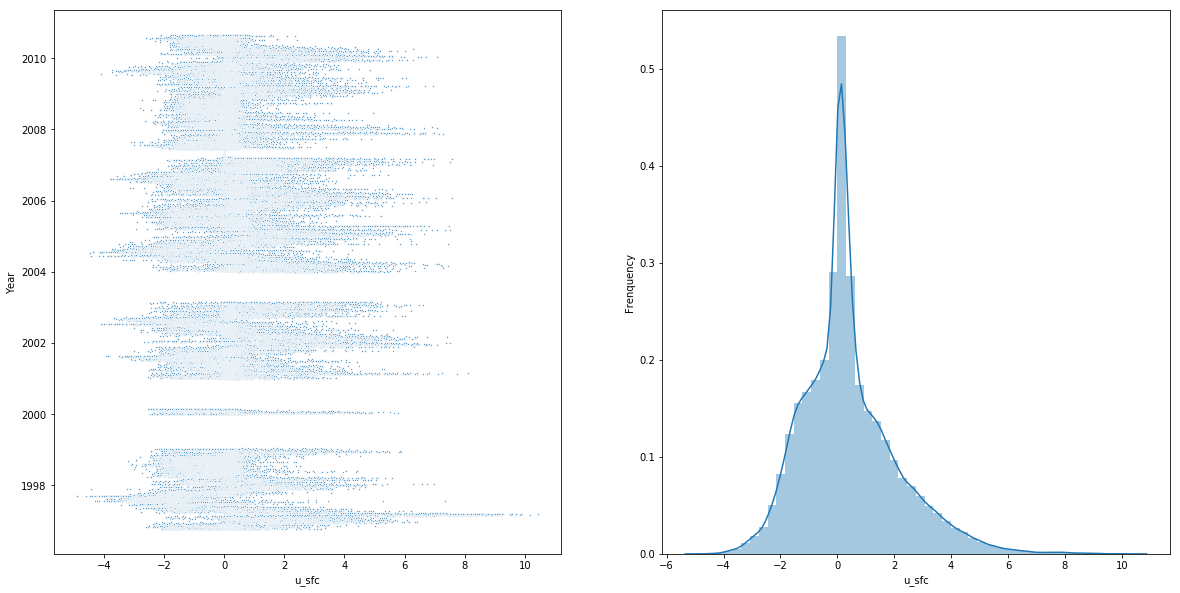

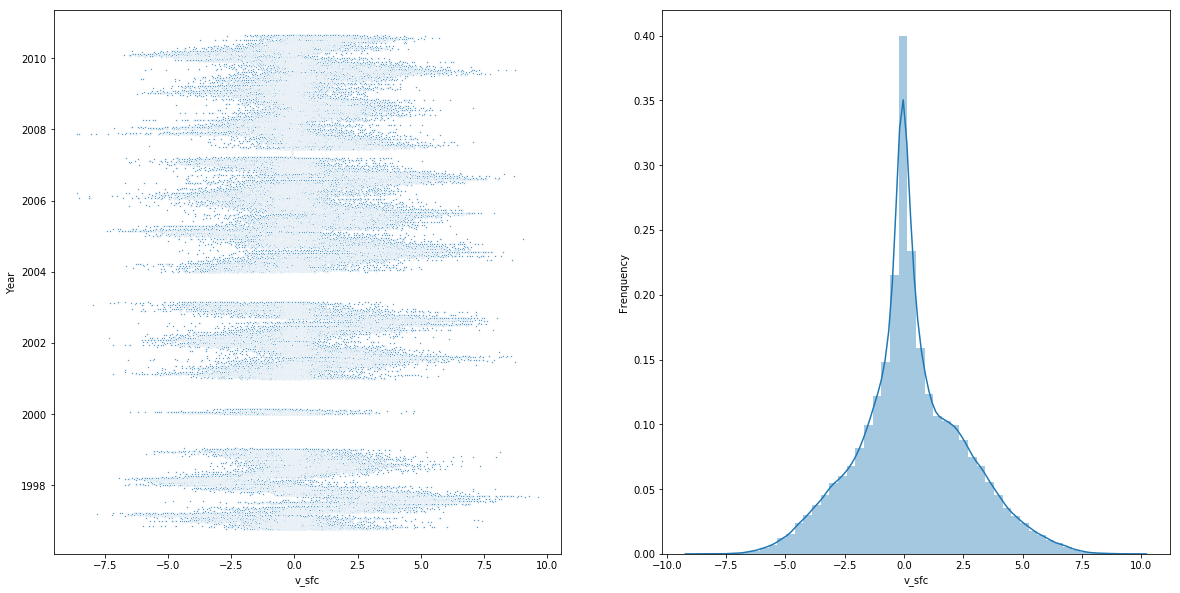

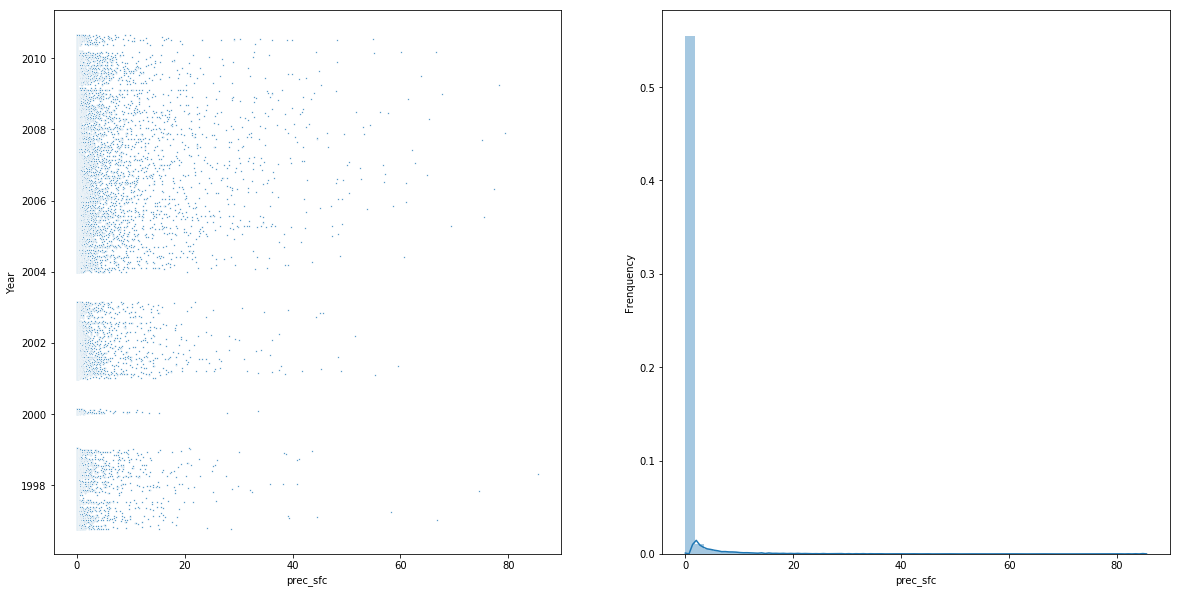

In [5]:
plot_1d(DS)

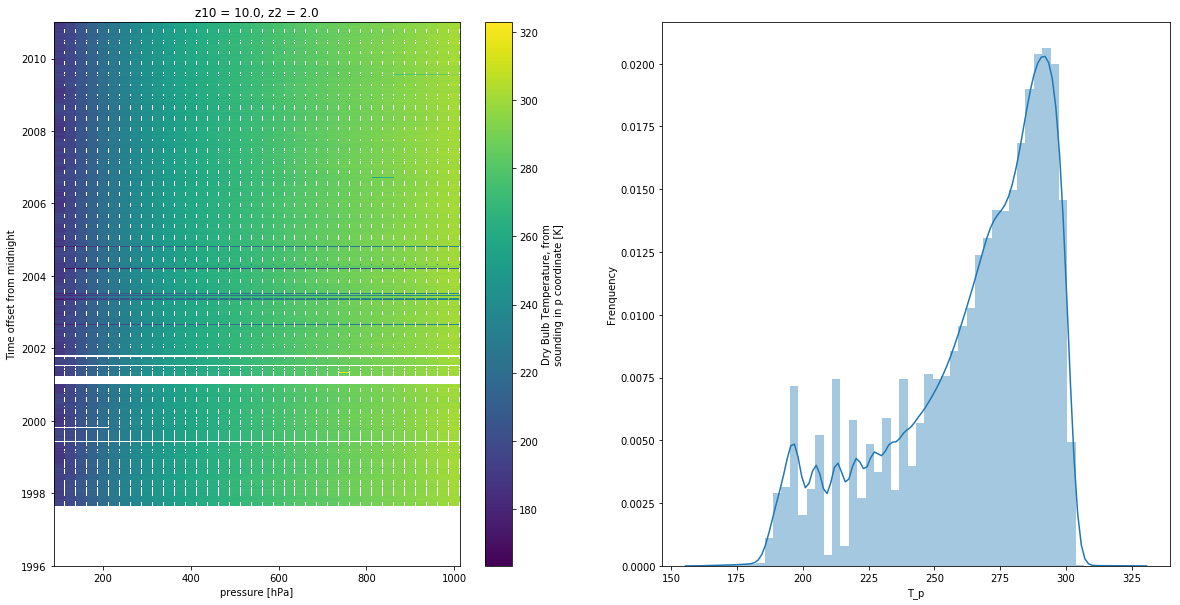

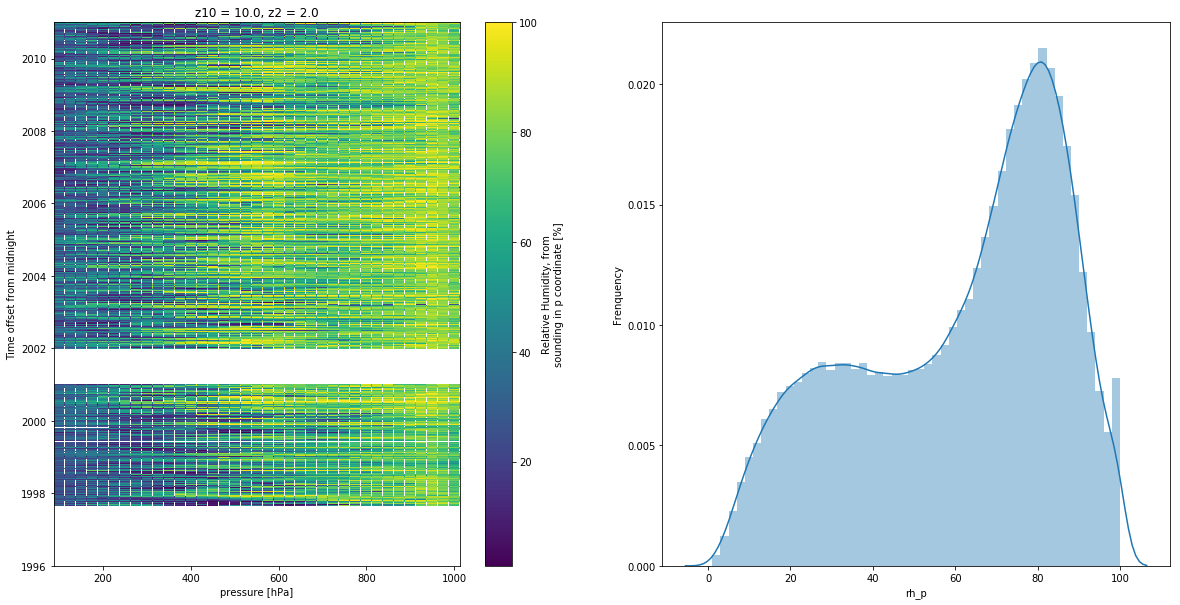

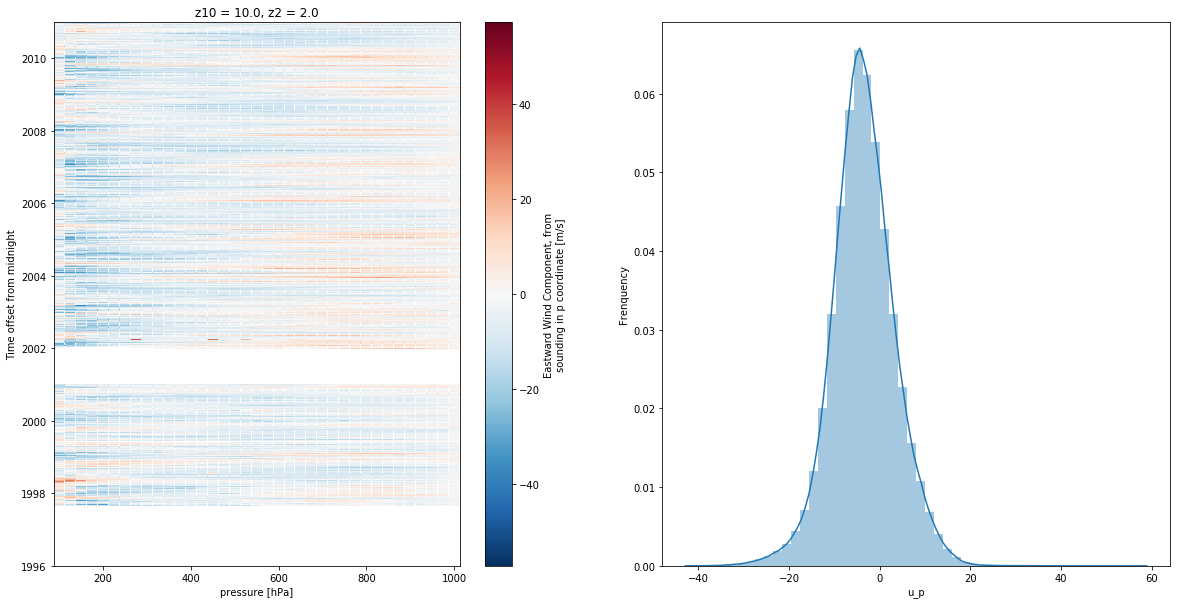

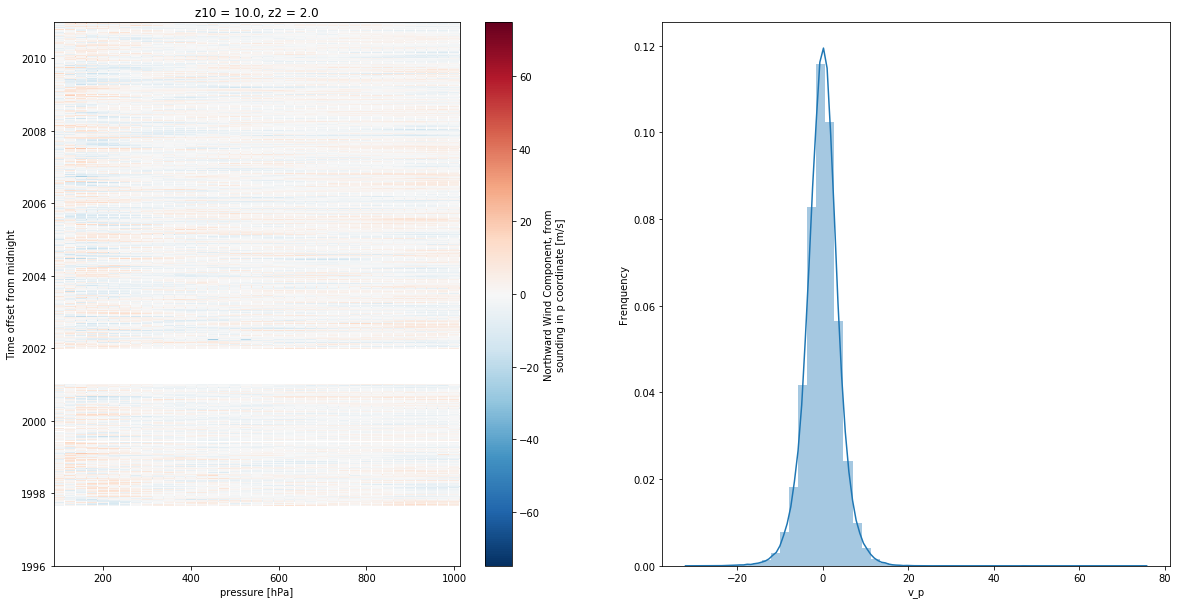

In [7]:
plot_2d(DS)

# Data Selection

In [6]:
def get_DS_select(DS, var_1d=var_1d, var_p_2d=var_p_2d, var_z_2d=var_z_2d, plev=plev, zlev=zlev):
    DS_select = xr.Dataset()
    for _var in var_1d:
        var_str = f'{_var}_sfc'
        DS_select = xr.merge([DS_select, DS[var_str]])

    for _var in var_p_2d:
        var_str = f'{_var}_p'
        DS_select = xr.merge([DS_select, DS[var_str]])

    for _var in var_z_2d:
        var_str = f'{_var}_z'
        DS_select = xr.merge([DS_select, DS[var_str]])

    return DS_select.drop(['z10', 'z2'])


def DS2df(DS, reset_index=True):
    df = DS.to_dataframe()
    if reset_index:
        df = df.reset_index()  # convert index (time) to a column
    return df

In [7]:
DS_select = get_DS_select(DS)
DS_select

<xarray.Dataset>
Dimensions:   (p: 37, time: 131496)
Coordinates:
  * time      (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
  * p         (p) float32 1000.0 975.0 950.0 925.0 ... 175.0 150.0 125.0 100.0
Data variables:
    T_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    p_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    rh_sfc    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    u_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    v_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    prec_sfc  (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p       (time, p) float32 dask.array<shape=(131496, 37), chunksize=(8784, 37)>
    rh_p      (time, p) float32 dask.array<shape=(131496, 37), chunksize=(8784, 37)>
    u_p       (time, p) float32 dask.array<shape=(131496, 37), chunksize=(8784, 37)>
    v_p       (time, p) float32 dask.array<shape

## Data Flattening (Obsolete)

In [8]:
def get_flattened_DS(DS, var_1d=var_1d, var_p_2d=var_p_2d, var_z_2d=var_z_2d, plev=plev, zlev=zlev):
    DS_flattened = xr.Dataset()
    for _var in var_1d:
        var_str = f'{_var}_sfc'
        DS_flattened = xr.merge([DS_flattened, DS[var_str]])

    for _var in var_p_2d:
        for _p in plev:
            var_str = f'{_var}_p'
            new_var_str = f'{var_str}{_p}'
            DS_flattened = xr.merge(
                [DS_flattened, DS[var_str].sel(p=_p).drop('p').rename(new_var_str)])

    for _var in var_z_2d:
        for _z in zlev:
            var_str = f'{_var}_z'
            new_var_str = f'{var_str}{_z}'
            DS_flattened = xr.merge(
                [DS_flattened, DS[var_str].sel(z=_z).drop('z').rename(new_var_str)])

    return DS_flattened.drop(['z10', 'z2'])


def DS2df(DS, reset_index=True):
    df = DS.to_dataframe()
    if reset_index:
        df = df.reset_index()  # convert index (time) to a column
    return df

In [9]:
# Flatten it
DS_flattened = get_flattened_DS(DS)
DS_flattened

<xarray.Dataset>
Dimensions:   (time: 131496)
Coordinates:
  * time      (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
Data variables:
    T_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    p_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    rh_sfc    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    u_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    v_sfc     (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    prec_sfc  (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p1000   (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p975    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p950    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p925    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p900    (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p87

# Precipitation Shift (Predictand)

In [11]:
'''
# Find out the shift of the parameter (column) of interest that maximizes our non-NaN sample size

def shift(df, shift_hour=1, col_name='prec_sfc', new_col_name='prec_sfc_next'):
    thing_next = df[col_name][shift:].values # turn to np values to get rid of index
    for j in range(1,shift+1):
        thing_next = np.append(thing_next,float('NaN')) # consistent length
    
    df_shift = df.copy()
    try: # enable re-run
        df_shift.insert(loc=0, column=new_col_name, value=thing_next) # insert the shifted column
    except:
        print('Column prec_sfc_next has already inserted.')
    return df_shift
        
def try_shift(df, n_trial=24):
    for shift_hour in range(1,n_trial+1):
        df_shift = shift(df, shift_hour=shift_hour)
        print(f'# shifted hour= {df_shift}, sample size= {(~df_shift.isnull().T.any()).sum()}')
    return None
'''

"\n# Find out the shift of the parameter (column) of interest that maximizes our non-NaN sample size\n\ndef shift(df, shift_hour=1, col_name='prec_sfc', new_col_name='prec_sfc_next'):\n    thing_next = df[col_name][shift:].values # turn to np values to get rid of index\n    for j in range(1,shift+1):\n        thing_next = np.append(thing_next,float('NaN')) # consistent length\n    \n    df_shift = df.copy()\n    try: # enable re-run\n        df_shift.insert(loc=0, column=new_col_name, value=thing_next) # insert the shifted column\n    except:\n        print('Column prec_sfc_next has already inserted.')\n    return df_shift\n        \ndef try_shift(df, n_trial=24):\n    for shift_hour in range(1,n_trial+1):\n        df_shift = shift(df, shift_hour=shift_hour)\n        print(f'# shifted hour= {df_shift}, sample size= {(~df_shift.isnull().T.any()).sum()}')\n    return None\n"

In [9]:
def da_shift_in_DS(DS, var_name, new_var_name, shift_hour=1):
    da_shifted = DS[var_name].shift(time=-shift_hour).rename(new_var_name)
    DS_shifted = xr.merge([da_shifted, DS])
    return DS_shifted


def try_shift(DS, var_name, max_shift_hour=24):
    for shift_hour in range(1, max_shift_hour+1):
        DS_shifted = da_shift_in_DS(DS,
                                    var_name=var_name,
                                    new_var_name='next',
                                    shift_hour=shift_hour).dropna(dim='time')
        size = DS_shifted.sizes['time']
        print(f'# shifted hour= {shift_hour}, sample size= {size}')
    
    return None

In [11]:
#try_shift(DS_flattened, var_name='prec_sfc')
flattened_flag = False

DS_shifted = da_shift_in_DS(DS_flattened if flattened_flag else DS_select,
                            var_name='prec_sfc',
                            new_var_name='prec_sfc_next',
                            shift_hour=1)
DS_shifted

<xarray.Dataset>
Dimensions:        (p: 37, time: 131496)
Coordinates:
  * time           (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
  * p              (p) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
Data variables:
    prec_sfc_next  (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    p_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    rh_sfc         (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    u_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    v_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    prec_sfc       (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p            (time, p) float32 dask.array<shape=(131496, 37), chunksize=(8784, 37)>
    rh_p           (time, p) float32 dask.array<shape=(131496, 37), chunksize=(8784, 37)>
   

# CAPE (Optional)

In [12]:
def bincount(da, figsize=(10, 8)):
    count = np.bincount(np.isnan(da.values).sum(axis=1))
    plt.figure(figsize=figsize)
    ax = sns.barplot(count, range(0,len(count)))
    ax.set(xlabel='NaN in a column', ylabel='# Measurement')
    plt.show()
    return None

In [ ]:
# Missing entries of T_z in each column
bincount(DS['T_z'])

In [12]:
def embed_sfc_to_col_dropna(da_sfc, DS_col, sfc_elevation=2.0):
    return xr.concat([da_sfc.assign_coords(z=np.float32(sfc_elevation)), DS_col], dim='z').drop(['z10', 'z2']).dropna(dim='time')


def CAPE_param(T_z_DS, env_lapse_rate=6.5, sfc_elevation=2.0):  # called by other functions only
    T_ap = list(T_z_DS.values)

    T_env = []
    T_sfc = T_z_DS.sel(z=sfc_elevation).values
    for z in T_z_DS['z']:
        GAMMA = env_lapse_rate / 1000  # convert it from per km to per m
        t = T_sfc - (z-sfc_elevation) * GAMMA
        T_env.append(float(t))

    delta_z = np.diff(T_z_DS['z'].values)
    z_profile = T_z_DS['z'].values
    return T_ap, T_env, delta_z, z_profile


def CAPE_discretize(T_ap, T_env, delta_z):
    # for every delta_z, ignore constant term g:
    B = [(x-y)/y for x, y in zip(T_ap, T_env)]
    delta_z = np.concatenate((delta_z, [0]))

    delta_CAPE = B * delta_z
    return delta_CAPE


def CAPE_integration(delta_CAPE):
    CAPE_val, buffer = 0, 0
    # If increment is +ve, increment the buffer;
    # if -ve, push (and reset) the buffer, the largest *pushed* buffer is CAPE
    # boundary case: if no pushed buffer CAPE=0; if delta(top of atmo) >0, it is not pushed
    for delta in delta_CAPE:
        if delta >= 0:
            buffer += delta
        elif buffer > CAPE_val:
            CAPE_val = buffer
            buffer = 0

    return CAPE_val


def CAPE(T_z_DS, plot=False, figsize=(20, 10)):
    T_ap, T_env, delta_z, z_profile = CAPE_param(T_z_DS)
    delta_CAPE = CAPE_discretize(T_ap, T_env, delta_z)
    CAPE_val = CAPE_integration(delta_CAPE)

    if plot:
        plt.figure(figsize=figsize)

        plt.subplot(1, 2, 1)
        ax = plot_T_z(T_ap, T_env, z_profile)
        plt.subplot(1, 2, 2)
        ax = plot_delta_CAPE(delta_CAPE, z_profile)
        plt.show()

    return CAPE_val


def list2da(data, data_name, dim, dim_name):
    return xr.DataArray(data,
                        coords={dim_name: dim},
                        dims=dim_name,
                        name=data_name)


def plot_T_z(T_ap, T_env, z_profile):
    ax = sns.lineplot(T_ap, z_profile)
    ax = sns.lineplot(T_env, z_profile)
    ax.set(xlabel='Temperature (K)', ylabel='Elevation (m)')
    return ax


def plot_delta_CAPE(delta_CAPE, z_profile):
    ax = sns.barplot(delta_CAPE, z_profile,
                     orient='h',
                     order=reversed(z_profile))
    ax.set(xlabel='CAPE increment', ylabel='Elevation (m)')
    return ax

In [ ]:
DS_T = embed_sfc_to_col_dropna(DS['T_sfc'], DS['T_z'])

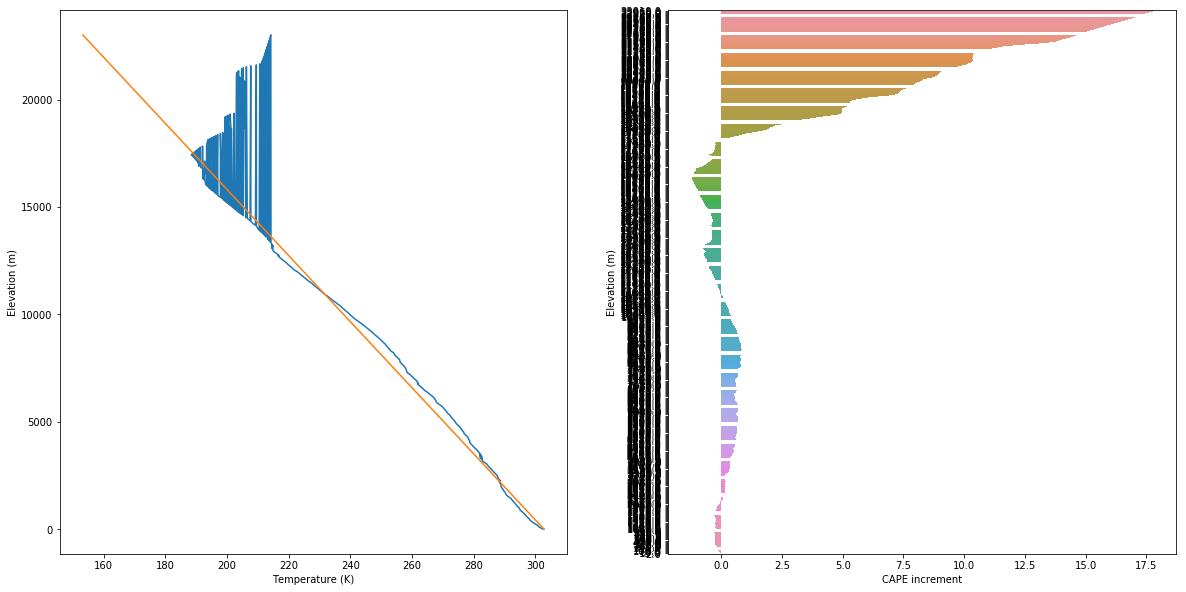

KeyboardInterrupt: 

In [15]:
# Calculate CAPE
_ = CAPE(DS_T[200], plot=True)

CAPE_list = list(map(CAPE, DS_T))

In [ ]:
len(CAPE_list)

In [ ]:
da_CAPE = list2da(CAPE_list, 'CAPE',
                  DS_T['time'], 'time')

da_CAPE

In [ ]:
DS_engineered = xr.merge([DS_shifted, da_CAPE])
DS_engineered

# Format Conversion (Optional)

In [ ]:
def show_non_nan(df):
    summary = pd.DataFrame({'Variable': list(df),
                            'Not NaN count': (~df.isna()).sum()}).set_index('Variable')
    print(summary)
    return None


def get_save_file_path(file_name, stage=1):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../../data/stage-{stage}_cleaned'
    FILE_PATH = f'{DATA_DIR}/{file_name}'
    return FILE_PATH


def save_csv(df, FILE_PATH):
    df.to_csv(FILE_PATH)
    print('Saved.')
    return None


def DS_dropna(DS):
    return DS.dropna(dim='time')

In [ ]:
# Convert DataSet to dataframe
df = DS2df(DS_dropna(DS_engineered), reset_index=True)
df.tail()

In [ ]:
# Count number of not NaN
show_non_nan(df)

In [ ]:
# Save file
file_name = 'twparmbeatmC1_CAPE_no_nan.csv'
FILE_PATH = get_save_file_path(file_name)

save_csv(df, FILE_PATH)

# Save DataSet

In [14]:
def save_netcdf(DS, FILE_PATH):
    DS.to_netcdf(FILE_PATH)
    print('Saved.')
    return None


def get_save_file_path(file_name, stage=1):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../../data/stage-{stage}_cleaned'
    FILE_PATH = f'{DATA_DIR}/{file_name}'
    return FILE_PATH

In [18]:
# Save file
file_name = 'twparmbeatmC1.cdf'
FILE_PATH = get_save_file_path(file_name)

save_netcdf(DS_shifted, FILE_PATH)

Saved.
